In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# สร้างข้อมูลอินพุต x1 และ x2 แบบสุ่ม
np.random.seed(42)
x1 = np.random.rand(1000) * 10  # ค่าในช่วง 0-10
x2 = np.random.rand(1000) * 5   # ค่าในช่วง 0-5

# สร้างค่าผลลัพธ์ y โดยกำหนดสมการ y = 3*x1 + 2*x2 + 5 + noise
noise = np.random.randn(1000) * 2  # เพิ่ม noise ให้ค่าข้อมูลมีความหลากหลาย
y = 3*x1 + 2*x2 + 5 + noise

# แปลงข้อมูลเป็น DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# กำหนดค่าเริ่มต้นของพารามิเตอร์ m1, m2 และ c
m1, m2, c = np.random.randn(3)

# กำหนด learning rate และจำนวนรอบการปรับค่าพารามิเตอร์
learning_rate = 0.001
epochs = 1000

# เก็บค่าของสมการในแต่ละ epoch
equations = []

# เริ่มต้น Gradient Descent
for epoch in range(epochs):
    # คำนวณค่าพยากรณ์ y_pred
    y_pred = m1*x1 + m2*x2 + c
    
    # คำนวณค่าความผิดพลาด (Error)
    error = y - y_pred
    
    # คำนวณค่า Gradient Descent
    dm1 = -2 * np.sum(x1 * error) / len(y)
    dm2 = -2 * np.sum(x2 * error) / len(y)
    dc = -2 * np.sum(error) / len(y)
    
    # อัปเดตค่าพารามิเตอร์
    m1 -= learning_rate * dm1
    m2 -= learning_rate * dm2
    c -= learning_rate * dc
    
    # บันทึกสมการที่อัปเดต
    if epoch % 100 == 0:  # บันทึกทุก ๆ 100 รอบ
        equations.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}")

# แสดงสมการที่ได้
equations[:10]  # แสดงสมการที่บันทึกไว้ใน 10 รอบแรก


['Epoch 0: y = 2.0426x1 + 0.4754x2 + -0.8373',
 'Epoch 100: y = 3.7893x1 + 2.1053x2 + -0.2442',
 'Epoch 200: y = 3.5999x1 + 2.4729x2 + -0.0403',
 'Epoch 300: y = 3.4953x1 + 2.6525x2 + 0.1326',
 'Epoch 400: y = 3.4355x1 + 2.7346x2 + 0.2873',
 'Epoch 500: y = 3.3991x1 + 2.7661x2 + 0.4308',
 'Epoch 600: y = 3.3752x1 + 2.7716x2 + 0.5667',
 'Epoch 700: y = 3.3579x1 + 2.7639x2 + 0.6968',
 'Epoch 800: y = 3.3441x1 + 2.7495x2 + 0.8222',
 'Epoch 900: y = 3.3324x1 + 2.7320x2 + 0.9436']

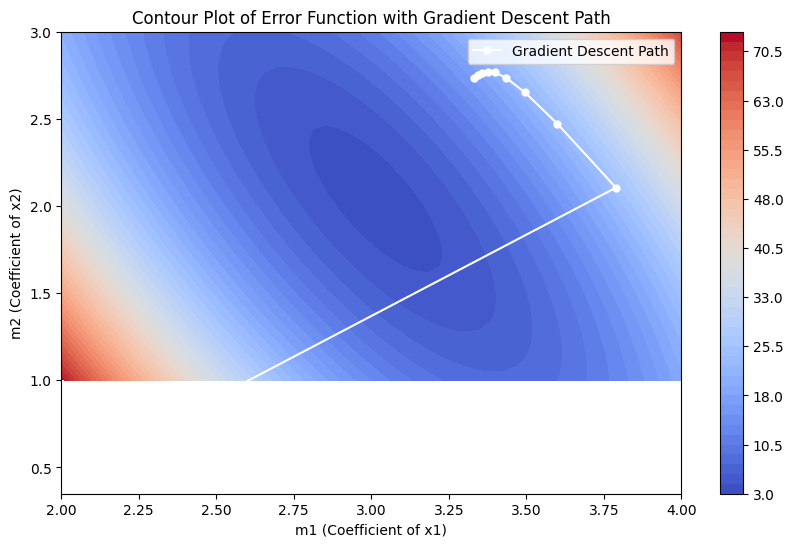

In [9]:
import matplotlib.pyplot as plt

# สร้าง Grid สำหรับ contour plot
m1_range = np.linspace(2, 4, 50)
m2_range = np.linspace(1, 3, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)

# คำนวณค่า Error (MSE) สำหรับแต่ละค่าใน Grid
Error = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * x1 + M2[i, j] * x2 + c
        Error[i, j] = np.mean((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
m1_vals = [float(eq.split('= ')[1].split('x1')[0]) for eq in equations]
m2_vals = [float(eq.split('+ ')[1].split('x2')[0]) for eq in equations]

plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of Error Function with Gradient Descent Path")
plt.legend()
plt.show()


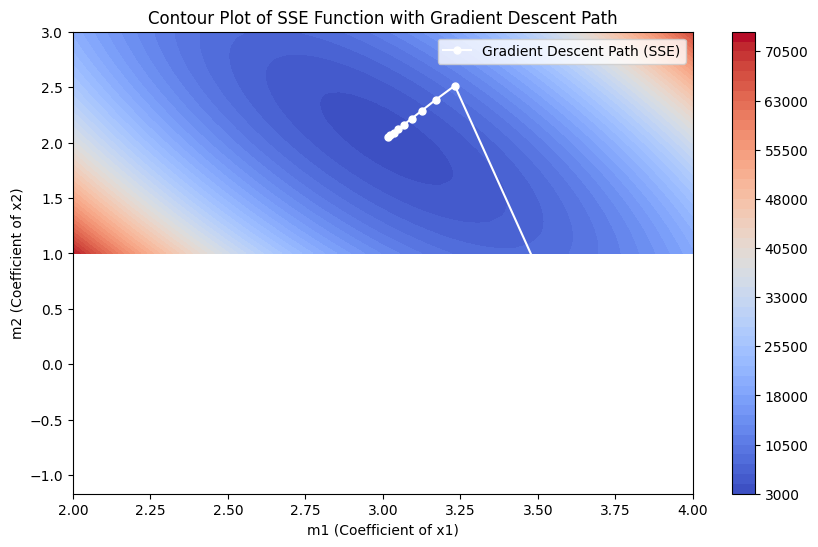

['Epoch 0: y = 3.7953x1 + -0.9687x2 + 0.5806',
 'Epoch 100: y = 3.2319x1 + 2.5133x2 + 2.1674',
 'Epoch 200: y = 3.1706x1 + 2.3869x2 + 2.8953',
 'Epoch 300: y = 3.1260x1 + 2.2894x2 + 3.4399',
 'Epoch 400: y = 3.0927x1 + 2.2164x2 + 3.8475',
 'Epoch 500: y = 3.0677x1 + 2.1617x2 + 4.1528',
 'Epoch 600: y = 3.0490x1 + 2.1207x2 + 4.3813',
 'Epoch 700: y = 3.0350x1 + 2.0901x2 + 4.5524',
 'Epoch 800: y = 3.0245x1 + 2.0671x2 + 4.6804',
 'Epoch 900: y = 3.0166x1 + 2.0500x2 + 4.7763']

In [3]:
# ใช้ค่า Sum of Squared Errors (SSE) แทนค่า Error MSE ใน Gradient Descent
# กำหนดค่าเริ่มต้นของพารามิเตอร์ m1, m2 และ c ใหม่
m1, m2, c = np.random.randn(3)

# กำหนด learning rate และจำนวนรอบการปรับค่าพารามิเตอร์
learning_rate = 0.00001
epochs = 1000

# เก็บค่าของสมการในแต่ละ epoch
equations_sse = []

# เริ่มต้น Gradient Descent โดยใช้ SSE
for epoch in range(epochs):
    # คำนวณค่าพยากรณ์ y_pred
    y_pred = m1*x1 + m2*x2 + c
    
    # คำนวณค่า Sum of Squared Errors (SSE)
    error = y - y_pred
    sse = np.sum(error ** 2)
    
    # คำนวณค่า Gradient Descent บน SSE
    dm1 = -2 * np.sum(x1 * error)
    dm2 = -2 * np.sum(x2 * error)
    dc = -2 * np.sum(error)
    
    # อัปเดตค่าพารามิเตอร์
    m1 -= learning_rate * dm1
    m2 -= learning_rate * dm2
    c -= learning_rate * dc
    
    # บันทึกสมการที่อัปเดต
    if epoch % 100 == 0:  # บันทึกทุก ๆ 100 รอบ
        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}")

# สร้าง Grid สำหรับ contour plot
m1_range = np.linspace(2, 4, 50)
m2_range = np.linspace(1, 3, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)

# คำนวณค่า SSE สำหรับแต่ละค่าใน Grid
Error_SSE = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * x1 + M2[i, j] * x2 + c
        Error_SSE[i, j] = np.sum((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error_SSE, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
m1_vals_sse = [float(eq.split('= ')[1].split('x1')[0]) for eq in equations_sse]
m2_vals_sse = [float(eq.split('+ ')[1].split('x2')[0]) for eq in equations_sse]

plt.plot(m1_vals_sse, m2_vals_sse, 'wo-', markersize=5, label="Gradient Descent Path (SSE)")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of SSE Function with Gradient Descent Path")
plt.legend()
plt.show()

# แสดงสมการบางส่วนที่ได้จาก SSE Gradient Descent
equations_sse[:10]


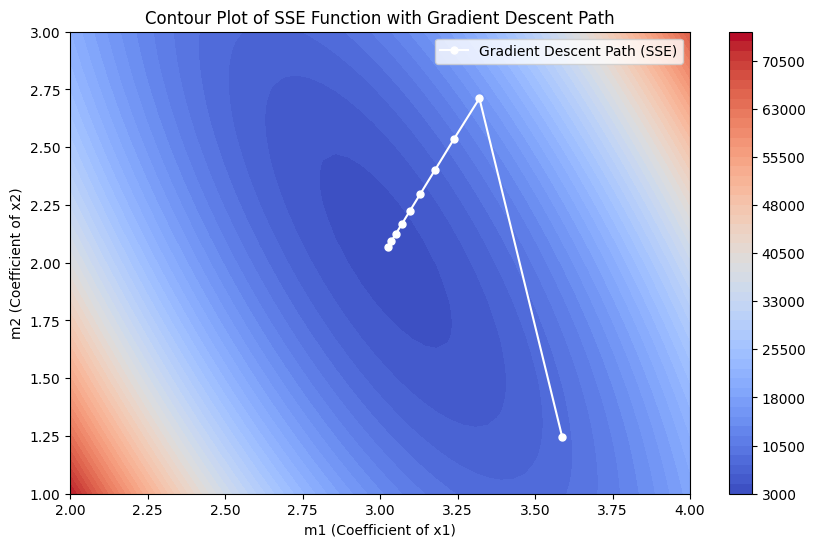

['Epoch 0: y = 3.5873x1 + 1.2475x2 + -0.5581',
 'Epoch 100: y = 3.3206x1 + 2.7115x2 + 1.0732',
 'Epoch 200: y = 3.2377x1 + 2.5338x2 + 2.0759',
 'Epoch 300: y = 3.1763x1 + 2.3993x2 + 2.8263',
 'Epoch 400: y = 3.1303x1 + 2.2986x2 + 3.3882',
 'Epoch 500: y = 3.0958x1 + 2.2233x2 + 3.8089',
 'Epoch 600: y = 3.0701x1 + 2.1669x2 + 4.1238',
 'Epoch 700: y = 3.0508x1 + 2.1246x2 + 4.3596',
 'Epoch 800: y = 3.0363x1 + 2.0930x2 + 4.5361',
 'Epoch 900: y = 3.0255x1 + 2.0693x2 + 4.6683']

In [4]:
# ต้องโหลดไลบรารีใหม่หลังจาก state ถูก reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# สร้างข้อมูลอินพุต x1 และ x2 แบบสุ่ม
np.random.seed(42)
x1 = np.random.rand(1000) * 10  # ค่าในช่วง 0-10
x2 = np.random.rand(1000) * 5   # ค่าในช่วง 0-5

# สร้างค่าผลลัพธ์ y โดยกำหนดสมการ y = 3*x1 + 2*x2 + 5 + noise
noise = np.random.randn(1000) * 2  # เพิ่ม noise ให้ค่าข้อมูลมีความหลากหลาย
y = 3*x1 + 2*x2 + 5 + noise

# กำหนดค่าเริ่มต้นของพารามิเตอร์ m1, m2 และ c ใหม่
m1, m2, c = np.random.randn(3)

# กำหนด learning rate และจำนวนรอบการปรับค่าพารามิเตอร์
learning_rate = 0.00001
epochs = 1000

# เก็บค่าของสมการในแต่ละ epoch
equations_sse = []

# เริ่มต้น Gradient Descent โดยใช้ SSE
for epoch in range(epochs):
    # คำนวณค่าพยากรณ์ y_pred
    y_pred = m1*x1 + m2*x2 + c
    
    # คำนวณค่า Sum of Squared Errors (SSE)
    error = y - y_pred
    sse = np.sum(error ** 2)
    
    # คำนวณค่า Gradient Descent บน SSE
    dm1 = -2 * np.sum(x1 * error)
    dm2 = -2 * np.sum(x2 * error)
    dc = -2 * np.sum(error)
    
    # อัปเดตค่าพารามิเตอร์
    m1 -= learning_rate * dm1
    m2 -= learning_rate * dm2
    c -= learning_rate * dc
    
    # บันทึกสมการที่อัปเดต
    if epoch % 100 == 0:  # บันทึกทุก ๆ 100 รอบ
        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}")

# สร้าง Grid สำหรับ contour plot
m1_range = np.linspace(2, 4, 50)
m2_range = np.linspace(1, 3, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)

# คำนวณค่า SSE สำหรับแต่ละค่าใน Grid
Error_SSE = np.zeros_like(M1)
for i in range(M1.shape[0]):
    for j in range(M1.shape[1]):
        y_pred_grid = M1[i, j] * x1 + M2[i, j] * x2 + c
        Error_SSE[i, j] = np.sum((y - y_pred_grid) ** 2)

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error_SSE, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot ตำแหน่งของค่า m1, m2 ในแต่ละรอบ
m1_vals_sse = [float(eq.split('= ')[1].split('x1')[0]) for eq in equations_sse]
m2_vals_sse = [float(eq.split('+ ')[1].split('x2')[0]) for eq in equations_sse]

plt.plot(m1_vals_sse, m2_vals_sse, 'wo-', markersize=5, label="Gradient Descent Path (SSE)")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of SSE Function with Gradient Descent Path")
plt.legend()
plt.show()

# แสดงสมการบางส่วนที่ได้จาก SSE Gradient Descent
equations_sse[:10]


C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

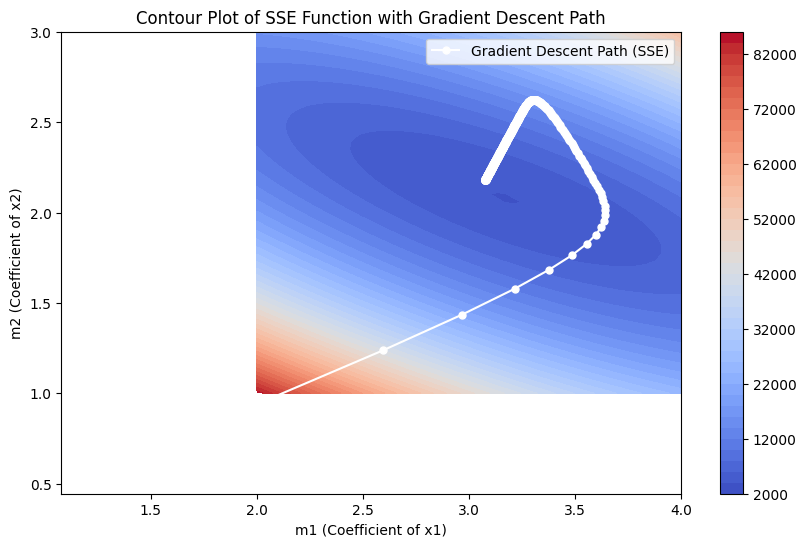

Final Equation: y = 3.0764x1 + 2.1801x2 + 4.0508


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor

# สร้างข้อมูลสุ่ม
np.random.seed(42)
x1, x2 = np.random.rand(1000) * 10, np.random.rand(1000) * 5
noise = np.random.randn(1000) * 2
y = 3*x1 + 2*x2 + 5 + noise

# เตรียม DataFrame
X = np.column_stack((x1, x2))

# ตั้งค่าตัวเรียนรู้แบบ SGD
sgd = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.00001, warm_start=True)

# เก็บค่าพารามิเตอร์ในแต่ละ epoch
m1_vals, m2_vals = [], []

# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์
for _ in range(1000):  # รัน 1000 epochs
    sgd.fit(X, y)
    m1_vals.append(sgd.coef_[0])
    m2_vals.append(sgd.coef_[1])

# ดึงค่าพารามิเตอร์สุดท้าย
m1, m2 = sgd.coef_
c = sgd.intercept_[0]

# สร้าง Grid สำหรับ contour plot
m1_range, m2_range = np.linspace(2, 4, 50), np.linspace(1, 3, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)
Error_SSE = np.array([[np.sum((y - (m1_ * x1 + m2_ * x2 + c))**2) 
                       for m2_ in m2_range] for m1_ in m1_range])

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error_SSE, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot เส้นทางของ Gradient Descent
plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path (SSE)")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of SSE Function with Gradient Descent Path")
plt.legend()
plt.show()

# แสดงสมการที่ได้
print(f"Final Equation: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}")


C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

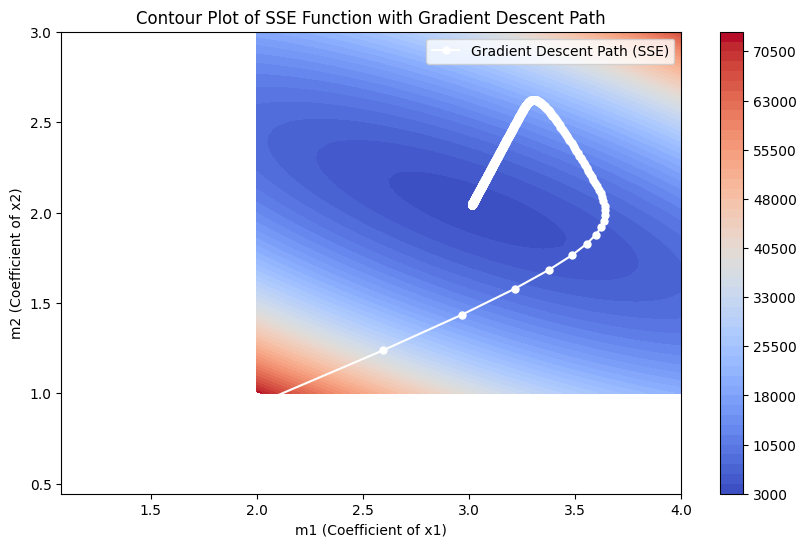

['Epoch 0: y = 1.2183x1 + 0.5665x2 + 0.2077',
 'Epoch 100: y = 3.3151x1 + 2.6210x2 + 1.3466',
 'Epoch 200: y = 3.2575x1 + 2.5725x2 + 1.8518',
 'Epoch 300: y = 3.2204x1 + 2.4963x2 + 2.2839',
 'Epoch 400: y = 3.1896x1 + 2.4292x2 + 2.6578',
 'Epoch 500: y = 3.1639x1 + 2.3716x2 + 2.9815',
 'Epoch 600: y = 3.1402x1 + 2.3211x2 + 3.2614',
 'Epoch 700: y = 3.1204x1 + 2.2777x2 + 3.5038',
 'Epoch 800: y = 3.1037x1 + 2.2403x2 + 3.7136',
 'Epoch 900: y = 3.0885x1 + 2.2077x2 + 3.8951',
 'Epoch 1000: y = 3.0759x1 + 2.1796x2 + 4.0522',
 'Epoch 1100: y = 3.0647x1 + 2.1551x2 + 4.1881',
 'Epoch 1200: y = 3.0557x1 + 2.1345x2 + 4.3059',
 'Epoch 1300: y = 3.0468x1 + 2.1159x2 + 4.4076',
 'Epoch 1400: y = 3.0405x1 + 2.1005x2 + 4.4959',
 'Epoch 1500: y = 3.0337x1 + 2.0867x2 + 4.5721',
 'Epoch 1600: y = 3.0285x1 + 2.0749x2 + 4.6381',
 'Epoch 1700: y = 3.0229x1 + 2.0642x2 + 4.6951',
 'Epoch 1800: y = 3.0194x1 + 2.0557x2 + 4.7446',
 'Epoch 1900: y = 3.0160x1 + 2.0481x2 + 4.7874',
 'Epoch 2000: y = 3.0124x1 + 2.0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# สร้างข้อมูลสุ่ม
np.random.seed(42)
x1, x2 = np.random.rand(1000) * 10, np.random.rand(1000) * 5
noise = np.random.randn(1000) * 2
y = 3*x1 + 2*x2 + 5 + noise

# เตรียม DataFrame
X = np.column_stack((x1, x2))

# ตั้งค่าตัวเรียนรู้แบบ SGD
sgd = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.00001, warm_start=True)

# เก็บค่าพารามิเตอร์ในแต่ละ epoch และสมการทุก ๆ 100 รอบ
m1_vals, m2_vals, equations_sse = [], [], []

# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์
for epoch in range(2001):  # รัน 1000 epochs
    sgd.fit(X, y)
    m1, m2 = sgd.coef_
    c = sgd.intercept_[0]

    m1_vals.append(m1)
    m2_vals.append(m2)

    if epoch % 100 == 0:
        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}")

# สร้าง Grid สำหรับ contour plot
m1_range, m2_range = np.linspace(2, 4, 50), np.linspace(1, 3, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)
Error_SSE = np.array([[np.sum((y - (m1_ * x1 + m2_ * x2 + c))**2) 
                       for m2_ in m2_range] for m1_ in m1_range])

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error_SSE, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot เส้นทางของ Gradient Descent
plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path (SSE)")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of SSE Function with Gradient Descent Path")
plt.legend()
plt.show()

# แสดงสมการที่บันทึกไว้ทุก 100 epochs
equations_sse

C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Pond0\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

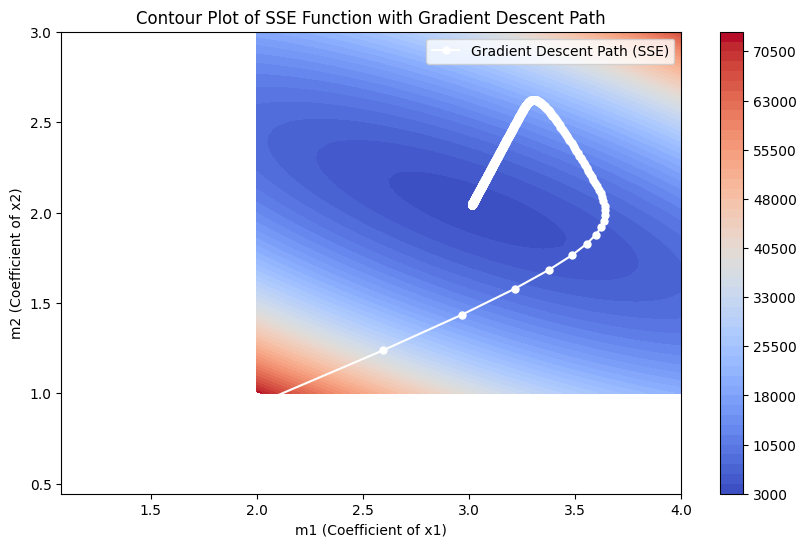

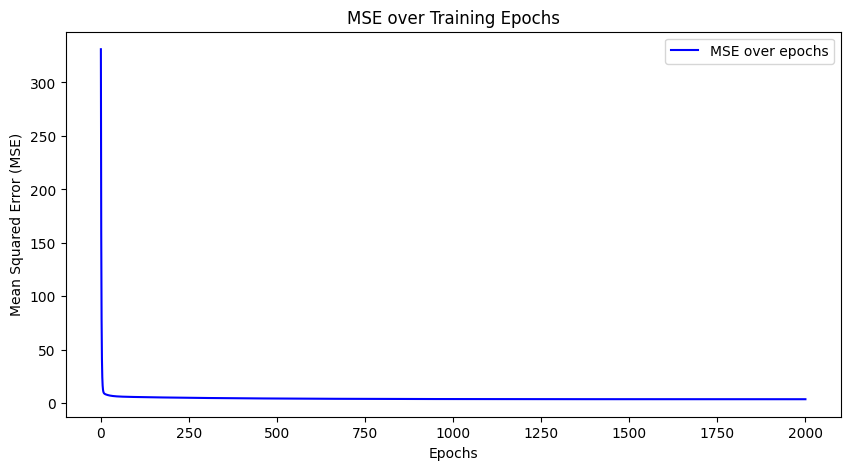

['Epoch 0: y = 1.2183x1 + 0.5665x2 + 0.2077, MSE = 331.0869',
 'Epoch 100: y = 3.3151x1 + 2.6210x2 + 1.3466, MSE = 5.8954',
 'Epoch 200: y = 3.2575x1 + 2.5725x2 + 1.8518, MSE = 5.3699',
 'Epoch 300: y = 3.2204x1 + 2.4963x2 + 2.2839, MSE = 4.9814',
 'Epoch 400: y = 3.1896x1 + 2.4292x2 + 2.6578, MSE = 4.6906',
 'Epoch 500: y = 3.1639x1 + 2.3716x2 + 2.9815, MSE = 4.4727',
 'Epoch 600: y = 3.1402x1 + 2.3211x2 + 3.2614, MSE = 4.3096',
 'Epoch 700: y = 3.1204x1 + 2.2777x2 + 3.5038, MSE = 4.1874',
 'Epoch 800: y = 3.1037x1 + 2.2403x2 + 3.7136, MSE = 4.0958',
 'Epoch 900: y = 3.0885x1 + 2.2077x2 + 3.8951, MSE = 4.0273',
 'Epoch 1000: y = 3.0759x1 + 2.1796x2 + 4.0522, MSE = 3.9760',
 'Epoch 1100: y = 3.0647x1 + 2.1551x2 + 4.1881, MSE = 3.9375',
 'Epoch 1200: y = 3.0557x1 + 2.1345x2 + 4.3059, MSE = 3.9087',
 'Epoch 1300: y = 3.0468x1 + 2.1159x2 + 4.4076, MSE = 3.8872',
 'Epoch 1400: y = 3.0405x1 + 2.1005x2 + 4.4959, MSE = 3.8711',
 'Epoch 1500: y = 3.0337x1 + 2.0867x2 + 4.5721, MSE = 3.8589',
 '

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# สร้างข้อมูลสุ่ม
np.random.seed(42)
x1, x2 = np.random.rand(1000) * 10, np.random.rand(1000) * 5
noise = np.random.randn(1000) * 2
y = 3*x1 + 2*x2 + 5 + noise

# เตรียม DataFrame
X = np.column_stack((x1, x2))

# ตั้งค่าตัวเรียนรู้แบบ SGD
sgd = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.00001, warm_start=True)

# เก็บค่าพารามิเตอร์ในแต่ละ epoch และสมการทุก ๆ 100 รอบ
m1_vals, m2_vals, mse_values, equations_sse = [], [], [], []

# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์และ error
for epoch in range(2001):  # รัน 2000 epochs
    sgd.fit(X, y)
    m1, m2 = sgd.coef_
    c = sgd.intercept_[0]

    y_pred = sgd.predict(X)
    mse = np.mean((y - y_pred) ** 2)  # คำนวณค่า MSE

    m1_vals.append(m1)
    m2_vals.append(m2)
    mse_values.append(mse)

    if epoch % 100 == 0:
        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}, MSE = {mse:.4f}")

# สร้าง Grid สำหรับ contour plot
m1_range, m2_range = np.linspace(2, 4, 50), np.linspace(1, 3, 50)
M1, M2 = np.meshgrid(m1_range, m2_range)
Error_SSE = np.array([[np.sum((y - (m1_ * x1 + m2_ * x2 + c))**2) 
                       for m2_ in m2_range] for m1_ in m1_range])

# Plot Contour
plt.figure(figsize=(10, 6))
contour = plt.contourf(M1, M2, Error_SSE, levels=50, cmap="coolwarm")
plt.colorbar(contour)

# Plot เส้นทางของ Gradient Descent
plt.plot(m1_vals, m2_vals, 'wo-', markersize=5, label="Gradient Descent Path (SSE)")

plt.xlabel("m1 (Coefficient of x1)")
plt.ylabel("m2 (Coefficient of x2)")
plt.title("Contour Plot of SSE Function with Gradient Descent Path")
plt.legend()
plt.show()

# Plot ค่า MSE ในแต่ละ epoch
plt.figure(figsize=(10, 5))
plt.plot(range(2001), mse_values, label="MSE over epochs", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE over Training Epochs")
plt.legend()
plt.show()

# แสดงสมการที่บันทึกไว้ทุก 100 epochs พร้อมค่า MSE
equations_sse


In [8]:
print(X)

[[3.74540119 0.92566464]
 [9.50714306 2.70950474]
 [7.31993942 4.36472918]
 ...
 [1.36818631 0.34479008]
 [9.50237354 0.28527361]
 [4.46005773 1.41093537]]
